# Importing all the useful Libraries

In [1]:
#Importing all the useful Libraries/Desporities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

# Reading the dataset

In [2]:
#importing the data
Nordic=pd.read_csv("Nordic_Kredit.csv")

In [3]:
#Reading the imported data
Nordic.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
#shape of the data
Nordic.shape

(1000, 21)

In [5]:
#description of data
Nordic.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [6]:
#Information about the data
Nordic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001845C8927B8>,
      dtype=object)

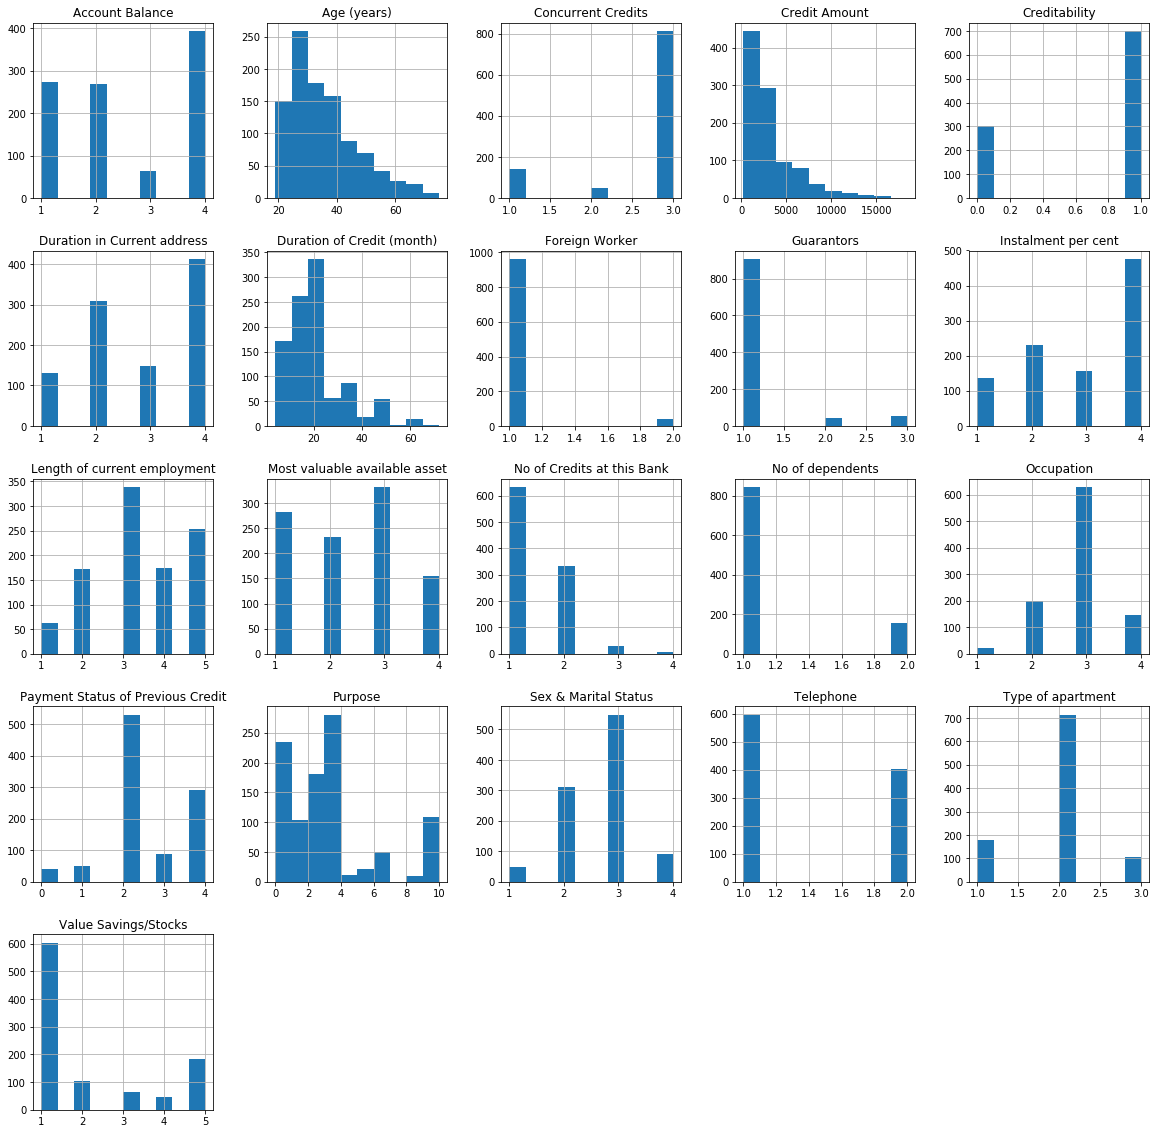

In [7]:
#histogram of every coloumns of data
Nordic.hist(figsize=(20,20))

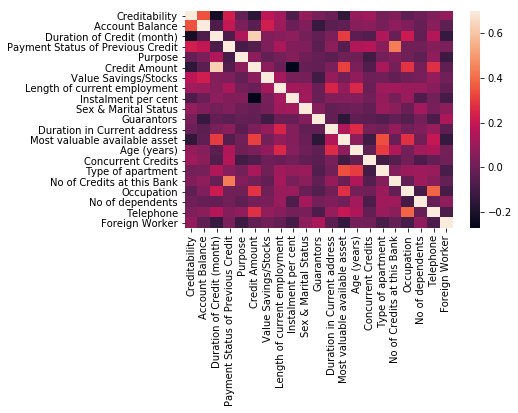

In [8]:
#correlation matrix
correlation=Nordic.corr()
#heatmap
sns.heatmap(correlation,vmax=0.7)

# Data Wrangling

Here, we drop entities which are less effective, with the help of HeatMAP

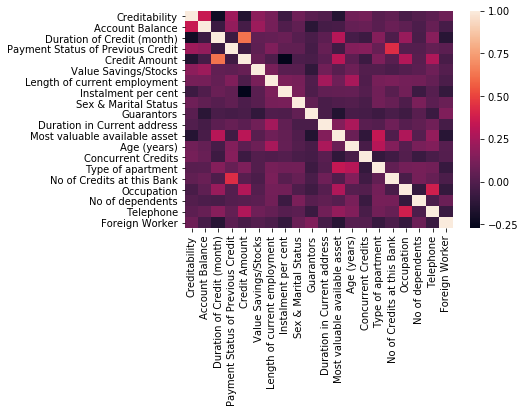

In [9]:
#Dropping unuseful data
Nordic.drop(["Purpose"],axis=1,inplace=True)
sns.heatmap(Nordic.corr())

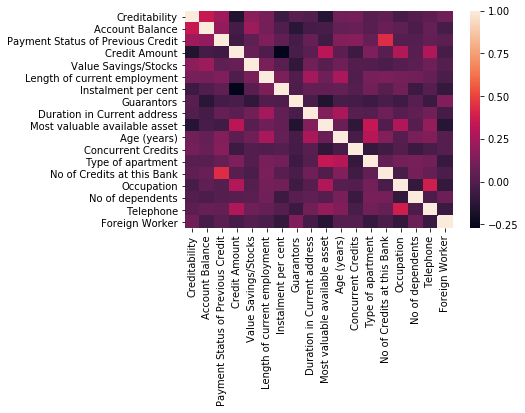

In [10]:
Nordic.drop(["Duration of Credit (month)","Sex & Marital Status"],axis=1,inplace=True)
sns.heatmap(Nordic.corr())

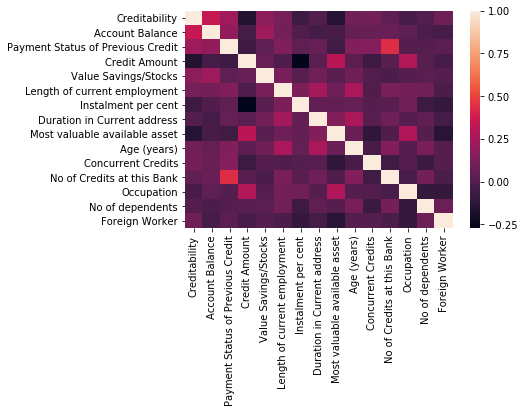

In [11]:
Nordic.drop(["Type of apartment","Telephone","Guarantors"],axis=1,inplace=True)
sns.heatmap(Nordic.corr())


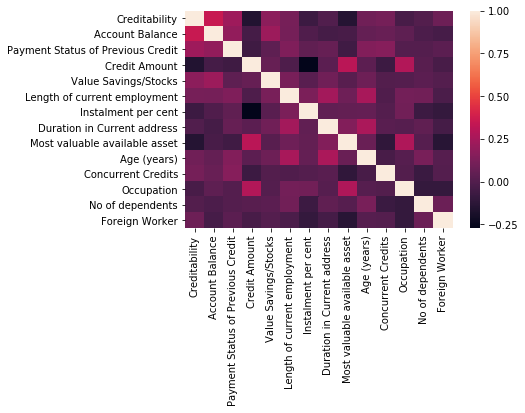

In [12]:
Nordic.drop(["No of Credits at this Bank"],axis=1,inplace=True)
sns.heatmap(Nordic.corr())

# Declartion of Dependent & Independent Variables

In [13]:
X=Nordic.drop("Creditability",axis=1) #independent variables
Y=Nordic['Creditability'] #dependent variable

Spliting the data into two parts, one for training the model and the other for testing the model

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# Logistic Regression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [15]:
logmodel=LogisticRegression(solver='newton-cg',random_state=1,multi_class='multinomial')
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
#prediction
prediction=logmodel.predict(X_test) 

In [17]:
confusion_matrix(Y_test,prediction)

array([[ 43,  48],
       [ 19, 190]], dtype=int64)

In [18]:
#accuracy of the model
accuracy_score(Y_test,prediction)

0.7766666666666666

# k-Nearest

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase.

In [19]:
# Create KNeighbors classifier object model 
model=KNeighborsClassifier(n_neighbors=6) # default value for n_neighbors is 5
# Train the model using the training sets and check score
model.fit(X, Y)
#Predict Output
predicted= model.predict(X_test)

In [20]:
#accuracy of the model
accuracy_score(Y_test,predicted)

0.7566666666666667

# Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [21]:
# Create Random Forest object
model= RandomForestClassifier()
# Train the model using the training sets and check score
model.fit(X, Y)
#Predict Output
predicted1= model.predict(X_test)

C:\Users\PRASRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
accuracy_score(Y_test,predicted1)

0.9866666666666667

# Gradient Boosting Algorithm

GBM, short for “Gradient Boosting Machine”, is introduced by Friedman in 2001. It is also known as MART (Multiple Additive Regression Trees) and GBRT (Gradient Boosted Regression Trees).
GBM constructs a forward stage-wise additive model by implementing gradient descent in function space. Similar to gradient descent in parameter space, at the m_th iteration, the direction of the steepest descent is given by the negative gradient of the loss function.

In [23]:
# Create Gradient Boosting Classifier object
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)
# Train the model using the training sets and check score
model.fit(X, Y)
#Predict Output
predictedGBA= model.predict(X_test)

In [24]:
accuracy_score(Y_test,predictedGBA)

0.7966666666666666

# SVM

Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well

In [25]:
# Encoding Categorical variables
t = LabelEncoder()
X.iloc[:,0] = t.fit_transform(X.iloc[:,0])
ohe = OneHotEncoder(categorical_features=[0])
X = ohe.fit_transform(X).toarray()
print(X)
X.dtype

[[1. 0. 0. ... 3. 1. 1.]
 [1. 0. 0. ... 3. 2. 1.]
 [0. 1. 0. ... 2. 1. 1.]
 ...
 [0. 0. 0. ... 4. 1. 1.]
 [0. 1. 0. ... 4. 1. 1.]
 [1. 0. 0. ... 3. 1. 1.]]


C:\Users\PRASRI\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\PRASRI\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


dtype('float64')

Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data so that each feature contributes approximately proportionately to the final Euclidean distance.

In [26]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\PRASRI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PRASRI\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\PRASRI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Fitting the classifier
classifier = SVC(kernel = 'linear', random_state = 10, C=10.0, gamma=1000)
classifier.fit(X_train, Y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1000, kernel='linear',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# Prediction
Y_Pred = classifier.predict(X_test)

In [29]:
# Accuracy score
print(accuracy_score(Y_test, Y_Pred))

0.7633333333333333
